<a href="https://colab.research.google.com/github/Lionmoon98/Simulacion2/blob/main/Generating_Random_Variables2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def n_random_numbers(a, c, m, seed, n):
    r = []
    xi = [0,seed]
    for i in range(1, n + 1):
        xi1 = ((a * xi[i]) + c) % m
        xi.append(xi1)
        r.append(xi1 / (m - 1))
    return r

In [ ]:
data_length = 10000

In [ ]:
random_numbers = n_random_numbers(1103515245,12345,2**31,1,data_length)

In [ ]:
print(random_numbers)

[0.5138700783782965, 0.17574130332830423, 0.3086515163577402, 0.5345338869535057, 0.9476279257552829, 0.17173630146856247, 0.7022311690739501, 0.2264306811738902, 0.49477344681265456, 0.1247203196979688, 0.08389880325826761, 0.38964712125698436, 0.2772257971936957, 0.3680707194693716, 0.9834371921529236, 0.535397940098959, 0.7656819032345349, 0.646473150535707, 0.7671388111855549, 0.7802369211708368, 0.8229514224561636, 0.15193229315426773, 0.6254767405919157, 0.3146848274928913, 0.3469010807326534, 0.9172044768543934, 0.5197599365002289, 0.40115420771816473, 0.6067583833852589, 0.7854021693511876, 0.9315228801833106, 0.8699210741882776, 0.8665246995475724, 0.674520347115826, 0.7583996005162594, 0.5818934578364219, 0.38924772403633584, 0.35563473559712744, 0.20023207375790555, 0.8269268394573251, 0.4159033142104295, 0.4635219273453215, 0.9791629970907992, 0.12643645197452813, 0.2126366990677252, 0.9584513734832645, 0.7374629344499963, 0.4090564630036505, 0.7801130669098874, 0.757899250

Ejemplo:

Datos historicos del tiempo de servicio en la caja de un banco se comportan de manera exponencial, con media de 3 minutos/cliente

In [ ]:
rate = 1/3

In [ ]:
from math import log

In [ ]:
def exponencial_random_variable(rn):
  x = []
  for elem in rn:
    x.append(-(1/rate)*log(1-elem))
  return x

In [ ]:
rvariable = exponencial_random_variable(random_numbers)

In [ ]:
import matplotlib.pyplot as plt


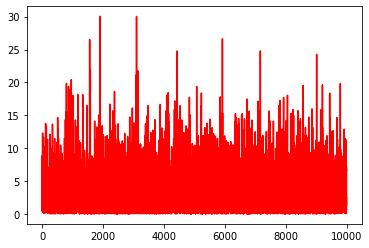

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(rvariable, 'r-', label='Exponential random variable')
plt.show()

# Modelo de una linea de espera con un servidor

El tiempo que transcurre entre la llegada de piezas a una **estacion de inspeccion** tiene una distribucion exponencial con media 5 minutos/pieza.

El proceso esta a cargo de un operario, y tarda en inspeccionar con una distribucion normal con media de 4 y desviacion estandar de 0.5 minutos/pieza.

Cual es el tiempo promedio de permanencia de la piezas en inspeccion

Sistema: Estacion de inspeccion

Entidades: Piezas

Eventos: Llegada, Fin de inspecciones

Eventos secundarios: Inicia la inspeccion

Datos extra: Tiempo entre llegadas, Tiempo de inspeccion

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from scipy.stats import norm

In [ ]:
df = pd.DataFrame()

In [ ]:
df["Tiempo entre llegadas generador"] = -5 * np.log(random_numbers)

In [ ]:
df["Llegada"] = df["Tiempo entre llegadas generador"].cumsum()

In [ ]:
df["Tiempo de inspeccion"] = norm.rvs(4,0.5,data_length)

In [ ]:
first_arrival = df.loc[lambda x: x.index == 0, "Llegada"].item()
first_inspection_time = df.loc[lambda x: x.index == 0, "Tiempo de inspeccion"].item()
init_inspection = [first_arrival]
end_inspection = [first_arrival+first_inspection_time]
for index, row in df.iterrows():
  if index == 0:
    continue
  current_init = max(end_inspection[index-1],row["Llegada"])
  init_inspection.append(current_init)
  end_inspection.append(current_init+row["Tiempo de inspeccion"])

df["Inicio de inspeccion"] = pd.Series(init_inspection)
df["Fin de inspeccion"] = pd.Series(end_inspection)
  

In [ ]:
df["Tiempo en inspeccion"] = df["Fin de inspeccion"] - df["Llegada"]

In [ ]:
df["Tiempo en espera"] = df["Inicio de inspeccion"] - df["Llegada"]

In [ ]:
average_time = []
init_range = 0
for i in range(1,data_length+1):
  temp_df = df.iloc[init_range:init_range+i]
  average_time.append(temp_df["Tiempo en inspeccion"].mean())

df["Tiempo promedio en inspeccion"] = pd.Series(average_time)


In [ ]:
df

,Tiempo entre llegadas generador,Llegada,Tiempo de inspeccion,Inicio de inspeccion,Fin de inspeccion,Tiempo en inspeccion,Tiempo en espera,Tiempo promedio en inspeccion
0,3.328924,3.328924,3.633862,3.328924,6.962786,3.633862,0.000000,3.633862
1,8.693711,12.022635,4.984448,12.022635,17.007083,4.984448,0.000000,4.309155
2,5.877712,17.900347,4.735305,17.900347,22.635652,4.735305,0.000000,4.451205
3,3.131801,21.032148,4.228707,22.635652,26.864359,5.832211,1.603504,4.796456
4,0.268967,21.301115,3.928139,26.864359,30.792498,9.491383,5.563244,5.735442
...,...,...,...,...,...,...,...,...
9995,2.709592,49895.580806,3.556059,49914.969259,49918.525317,22.944511,19.388453,12.309874
9996,3.054994,49898.635800,3.888754,49918.525317,49922.414072,23.778272,19.889518,12.311021
9997,5.529300,49904.165099,3.982627,49922.414072,49926.396699,22.231599,18.248972,12.312013
9998,0.502707,49904.667806,4.440073,49926.396699,49930.836772,26.168966,21.728892,12.313399


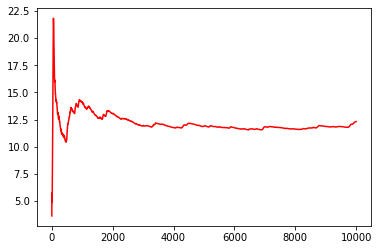

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(df["Tiempo promedio en inspeccion"], 'r')
plt.show()